## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import re
import warnings
import emoji
import random
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, callbacks

# Set random seed for reproducibility
random_seed = 2024
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [4]:
# Define configuration
class Config():
    seed = random_seed
    word_count = 1000
    train_path = "C:/Users/zeena/OneDrive/Documents/WINTER2024/Deep Learning/COMP263_Project_Final/COMP263_Project/train.csv"
    test_path = "C:/Users/zeena/OneDrive/Documents/WINTER2024/Deep Learning/COMP263_Project_Final/COMP263_Project/test.csv"

# Function to remove HTML tags
def remove_html_tags(text):
    html_pattern = re.compile(r'<.*?>')
    return html_pattern.sub(r'', text)

# Function for data preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = remove_html_tags(text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub("@\w+", '', text)
    text = re.sub("'\d+", '', text)
    text = re.sub("\d+", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub("http\w+", '', text)
    text = re.sub("\s[a-z]\s", '', text)
    text = text.strip()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [5]:
# Seed everything
np.random.seed(Config.seed)
random.seed(Config.seed)
tf.random.set_seed(Config.seed)

# Read data
train_df = pd.read_csv(Config.train_path)
train_df['text'] = train_df['text'].apply(preprocess_text)
print(f"len(train_df): {len(train_df)}")

test_df = pd.read_csv(Config.test_path)
test_df['text'] = test_df['text'].apply(preprocess_text)
print(f"len(test_df): {len(test_df)}")

# Create word dictionary
text = train_df['text'].values
word_dict = {}
for i in range(len(text)):
    for j in range(len(text[i])):
        if text[i][j] in word_dict:
            word_dict[text[i][j]] += 1
        else:
            word_dict[text[i][j]] = 1

sorted_items = sorted(word_dict.items(), key=lambda x: -x[1])
sorted_list = list(sorted_items)
top_words = [value[0] for value in sorted_list[:Config.word_count]]

len(train_df): 7613
len(test_df): 3263


In [8]:
train_text=train_df['text'].values
test_text=test_df['text'].values
X=np.array([[int(top_word in text) for top_word in top_words] for text in train_text])
y=train_df['target'].values
test_X=np.array([[int(top_word in text) for top_word in top_words] for text in test_text])
print(f"X.shape:{X.shape},y.shape:{y.shape}")

X.shape:(7613, 1000),y.shape:(7613,)


In [9]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1
...,...,...,...,...,...
7608,10869,NaN,NaN,"[two, giant, cranes, holdingbridge, collapse, ...",1
7609,10870,NaN,NaN,"[control, wild, fires, california, even, north...",1
7610,10871,NaN,NaN,"[utckmof, volcano, hawaii]",1
7611,10872,NaN,NaN,"[police, investigating, ebike, collided, withc...",1


In [10]:
train_df[train_df["target"] == 0]

,id,keyword,location,text,target
15,23,NaN,NaN,"[whats, man]",0
16,24,NaN,NaN,"[love, fruits]",0
17,25,NaN,NaN,"[summer, lovely]",0
18,26,NaN,NaN,"[car, fast]",0
19,28,NaN,NaN,[whatgoooooooaaaaaal],0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,"[great, atmosphere, british, lion, gig, tonigh...",0
7582,10834,wrecked,NaN,"[cramer, igers, words, wrecked, disneys, stock...",0
7584,10837,NaN,NaN,"[boxes, ready, explode, exploding, kittens, fi...",0
7587,10841,NaN,NaN,"[sirens, everywhere]",0


In [7]:
train_df[train_df["target"] == 0]["text"]

15                                           [whats, man]
16                                         [love, fruits]
17                                       [summer, lovely]
18                                            [car, fast]
19                                  [whatgoooooooaaaaaal]
                              ...                        
7581    [great, atmosphere, british, lion, gig, tonigh...
7582    [cramer, igers, words, wrecked, disneys, stock...
7584    [boxes, ready, explode, exploding, kittens, fi...
7587                                 [sirens, everywhere]
7593    [heardreally, loud, bang, everyone, asleep, gr...
Name: text, Length: 4342, dtype: object

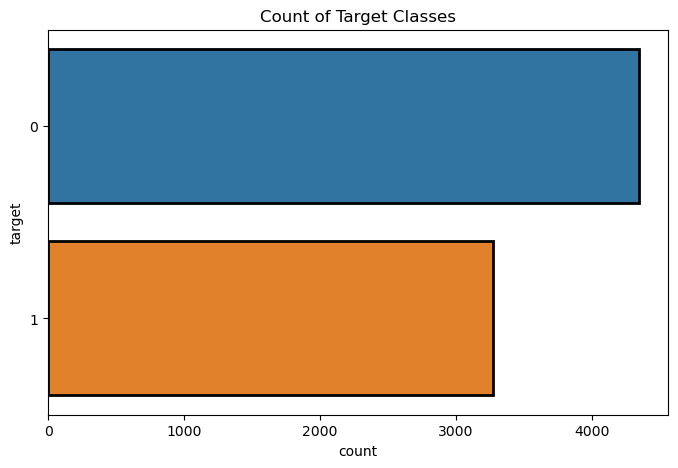

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the target classes
plt.figure(figsize=(8,5))
plt.title("Count of Target Classes")
sns.countplot(y=train_df["target"],linewidth=2,
                   edgecolor='black')

plt.show()

# Let's start by analysing total number of characters in text.

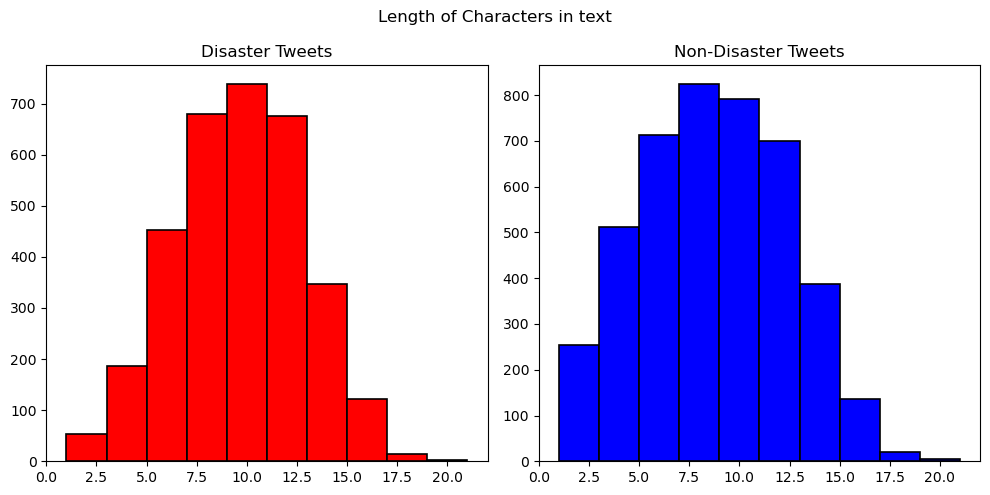

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
char_len_dis = train_df[train_df['target']==1]['text'].str.len()
ax1.hist(char_len_dis,color='red',edgecolor='black', linewidth=1.2)
ax1.set_title('Disaster Tweets')
char_len_ndis = train_df[train_df['target']==0]['text'].str.len()
ax2.hist(char_len_ndis,color='blue',edgecolor='black', linewidth=1.2)
ax2.set_title('Non-Disaster Tweets')
plt.suptitle("Length of Characters in text")
plt.tight_layout()
plt.show()

In [13]:
# Creating sample corpus for further analysis.
def create_corpus(target):
    corpus = []
    for x in train_df[train_df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

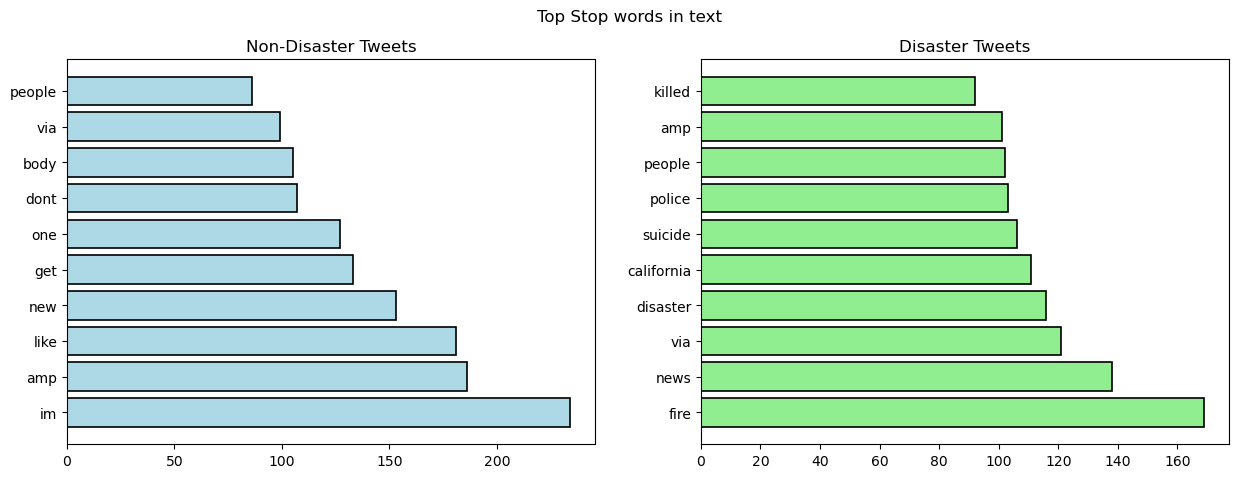

In [14]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to create corpus
def create_corpus(text):
    corpus = []
    for sentence in text:
        for word in sentence:
            corpus.append(word)
    return corpus

# Function to analyze top stop words in text
def analyze_stopwords(data, func, target):
    values_list = []
    for label in target:
        dic = defaultdict(int)
        corpus = func(data[data['target'] == label]['text'])
        for word in corpus:
            dic[word] += 1
        top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]
        x_items, y_values = zip(*top)
        values_list.extend(list(x_items))
        values_list.extend(list(y_values))
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.barh(values_list[:10], values_list[10:20], color="lightblue", edgecolor='black', linewidth=1.2)
    ax1.set_title("Non-Disaster Tweets")
    
    ax2.barh(values_list[20:30], values_list[30:], color="lightgreen", edgecolor='black', linewidth=1.2)
    ax2.set_title("Disaster Tweets")
            
    plt.suptitle("Top Stop words in text")
    plt.show()

# Call analyze_stopwords function
analyze_stopwords(train_df, create_corpus, [0, 1])


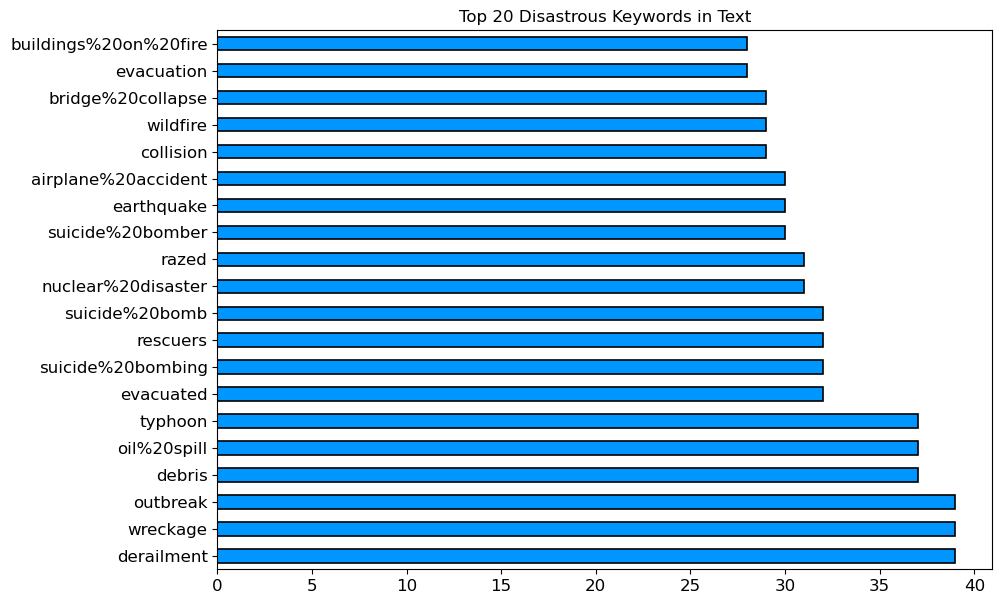

In [15]:
# Analysing Top 20  disastrous KeyWords in text .
plt.figure(figsize=(10,7))
train_df[train_df['target']==1]['keyword'].value_counts()[:20].plot(kind='barh', fontsize=12,title='Top 20 Disastrous Keywords in Text', color='#0096FF',edgecolor='black', linewidth=1.2)
plt.show()

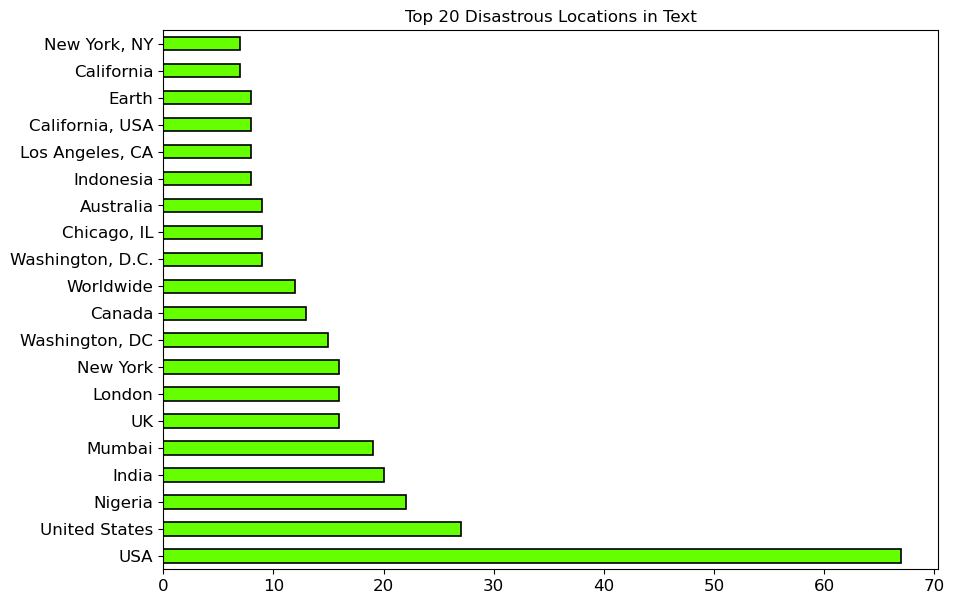

In [16]:
# Analysing Top 20 disastrous Locations in text.
plt.figure(figsize=(10,7))
train_df[train_df["target"]==1]["location"].value_counts()[:20].plot(kind='barh',fontsize=12, title='Top 20 Disastrous Locations in Text', color='#66ff00',edgecolor='black', linewidth=1.2)
plt.show()

# # Classification using CNN

In [19]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(2024)

# Function for data preprocessing
def dataPreprocessing(x):  
    # Define your text preprocessing steps here
    return x

# Load and preprocess data
train_df = pd.read_csv("C:/Users/zeena/OneDrive/Documents/WINTER2024/Deep Learning/COMP263_Project_Final/COMP263_Project/train.csv"
)
train_df['text'] = train_df['text'].apply(dataPreprocessing)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['target'], test_size=0.2, random_state=2024)

# Tokenize text data
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

# Train Word2Vec embeddings
word2vec_model = Word2Vec(sentences=train_df['text'], vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Check vocabulary size of Word2Vec embeddings
vocab_size_word2vec = len(word2vec_model.wv)
print("Vocabulary size of Word2Vec embeddings:", vocab_size_word2vec)

# Check vocabulary size of the tokenizer
vocab_size_tokenizer = len(tokenizer.word_index)
print("Vocabulary size of the tokenizer:", vocab_size_tokenizer)

# Build CNN model with pre-trained word embeddings

embedding_dim = 100
vocab_size = max_words

cnn_model = Sequential([
    Embedding(input_dim=vocab_size_word2vec, output_dim=embedding_dim,
              trainable=True),  # Embedding layer without specifying weights
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping]  # add early stopping here
)


# Obtain word embeddings from the Word2Vec model
embedding_matrix = word2vec_model.wv.vectors

# Set the weights of the Embedding layer to the pre-trained word embeddings
cnn_model.layers[0].set_weights([embedding_matrix])

# Evaluate CNN model on validation set
val_loss, val_accuracy = cnn_model.evaluate(X_val_pad, y_val)
print(f'Validation accuracy: {val_accuracy}')



NameError: name 'embedding_dim' is not defined

In [28]:
# Predict on test set
X_test_seq = tokenizer.texts_to_sequences(test_df['text'])
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
test_pred = (cnn_model.predict(X_test_pad) > 0.5).astype(int)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [27]:
from sklearn.metrics import accuracy_score
# Load true labels of the test data
true_labels = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")['target']

# Calculate accuracy
test_accuracy = accuracy_score(true_labels, test_pred)
print(f'Test accuracy: {test_accuracy}')


Test accuracy: 0.2549800796812749


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


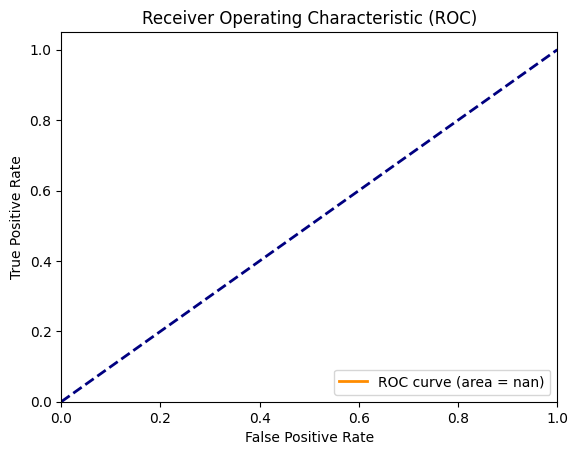

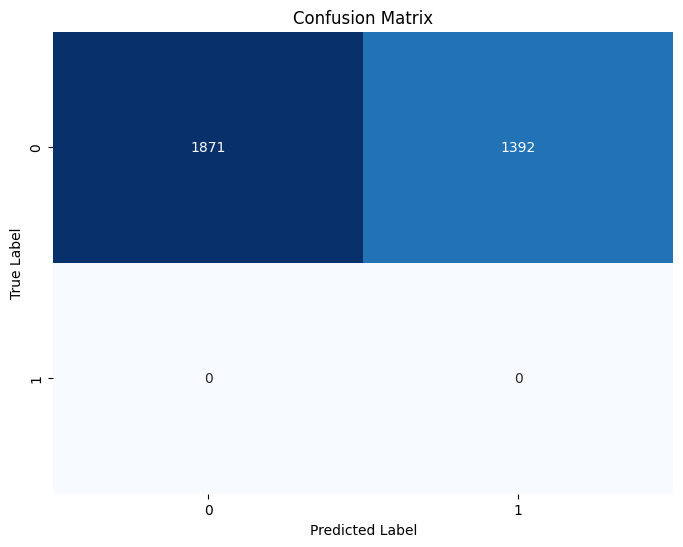

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Obtain predictions from the CNN model on the test set
y_pred_proba = cnn_model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
